<h1>Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Download and import the data file COVID-19 Data.csv (89 data points)

In [2]:
covid19=pd.read_csv('./COVID-19_Data.csv')

2. Divide the data into a dependent feature X: number of tests and a target variable Y: number of cases.

In [3]:
x=covid19.iloc[:,:-1]
y=covid19.iloc[:,1]

3. Compute the correlation coefficient between the two variables. Comment on the result

In [4]:
print(covid19.corr())

          Tests     Cases
Tests  1.000000  0.881408
Cases  0.881408  1.000000


Comment: There is a strong correlation between the independent features (x) and the dependent features (y)

4. Fit the model using linear regression and display ω0 and ω1

In [5]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x, y)
print("ω1=",reg1.coef_[0])
print("ω0=",reg1.intercept_)

ω1= 0.1857231050883341
ω0= 97.77688905214194


5. Plot the scatter of points along with the linear model

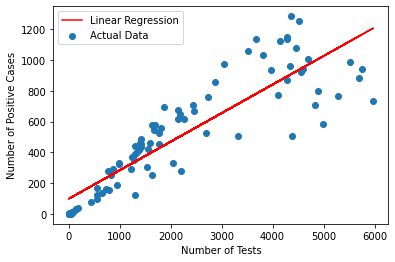

In [6]:
y_pred=reg1.predict(x)
plt.scatter(x,y,label='Actual Data')
plt.plot(x,y_pred,label='Linear Regression',color='red')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Positive Cases')
plt.legend()

6. Normalize the data to reduce the largest eigenvalue of the quadratic problem and then run the same experiment. The normalization can be done by dividing both X and Y by the maximum value

In [7]:
x_norm=x/x.max()
y_norm=y/y.max()
reg2 = LinearRegression()
reg2.fit(x_norm, y_norm)
print("ω1=",reg2.coef_[0])
print("ω0=",reg2.intercept_)

ω1= 0.8629981793637681
ω0= 0.07609096424291223


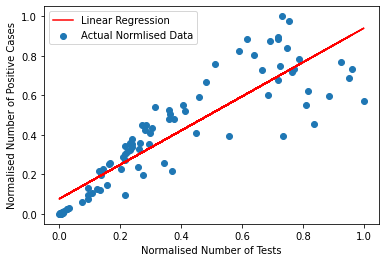

In [8]:
y_pred=reg2.predict(x_norm)
plt.scatter(x_norm,y_norm,label='Actual Normlised Data')
plt.plot(x_norm,y_pred,label='Linear Regression',color='red')
plt.xlabel('Normalised Number of Tests')
plt.ylabel('Normalised Number of Positive Cases')
plt.legend()

7. Compare the results of the two models

In [9]:
print("The score of the first model:",reg1.score(x,y))
print("The score of the second model:",reg2.score(x_norm,y_norm))
print("First model score / Second model score=",str(reg1.score(x,y)/reg2.score(x_norm,y_norm)*100)+"%")

The score of the first model: 0.7768795459594345
The score of the second model: 0.7768795459594346
First model score / Second model score= 99.99999999999999%


We see that both methods returned almost the same results.

<h2>Problem 2

1. Download the data file kc house data.csv.
2. Import the dependent features kc house data.csv using the Python function .read csv.

In [10]:
kc_price=pd.read_csv('./kc_house_data.csv')

3. Use the function .info() to check for missing or NaN values in the data.

In [11]:
kc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are missing values in 'waterfront', 'view', and 'yr_renovated')

4. Use the function .fillna() to fill nulls with 0 for “waterfront”, “view” and “yr renovated”. Replace ? values with 0.

In [12]:
kc_price=kc_price.fillna(value={'waterfront':0, 'view':0, 'yr_renovated':0})
kc_price=kc_price.replace('?',0)

NOTE: We see that sqft_basement type is "object" hence we will convert it to a numeric values (float) in order to include it in pairplot, describe and other functions

In [13]:
kc_price["sqft_basement"] = pd.to_numeric(kc_price["sqft_basement"])

5. Use the function .describe() to look into the statistics of the data. Comment on the results and check for outliers.

In [14]:
kc_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
# 33 bedrooms looks to be an outlier, we check it:
kc_price.loc[kc_price['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [16]:
# This 33 bedrooms is an outlier, hence we will delete it from the data
kc_price=kc_price.drop(kc_price.loc[kc_price['bedrooms'] == 33].index)
# Now we check again if any next outlier in "bedrooms"
kc_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,285.702954,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,439.825454,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
# 11 bedrooms looks to be an outlier, we check it:
kc_price.loc[kc_price['bedrooms'] == 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


In [18]:
# This 11 bedrooms is an outlier, hence we will delete it from the data
kc_price=kc_price.drop(kc_price.loc[kc_price['bedrooms'] == 11].index)
# Now we check again if any next outlier in "bedrooms"
kc_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159500e+04,2.159500e+04,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000
mean,4.580705e+09,5.402929e+05,3.371475,2.115802,2080.300579,1.510030e+04,1.494096,0.006761,0.233202,3.409771,7.657976,1788.603195,285.688400,1971.003241,68.672007,98077.949386,47.560087,-122.213970,1986.676962,12759.017782
std,2.876767e+09,3.673845e+05,0.902643,0.768992,918.121966,4.141445e+04,0.539686,0.081948,0.764705,0.650480,1.173237,827.771962,439.830437,29.373926,363.816998,53.514939,0.138555,0.140724,685.236784,27275.598218
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.309000e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
# 10 bedrooms might be an outlier, we check it:
kc_price.loc[kc_price['bedrooms'] == 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [20]:
# We decided that only last two instances are outliers, hence will drop them:
kc_price=kc_price.drop(kc_price.loc[kc_price['id'] == 5566100170].index)
kc_price=kc_price.drop(kc_price.loc[kc_price['id'] == 8812401450].index)
# Now we check again if any other outliers in the data
kc_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159300e+04,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,4.580464e+09,5.402823e+05,3.370861,2.115767,2080.190849,1.510097e+04,1.494049,0.006761,0.233224,3.409716,7.658037,1788.543324,285.637985,1971.006530,68.678368,98077.951466,47.560082,-122.213967,1986.682675,12759.474367
std,2.876749e+09,3.673999e+05,0.900428,0.769004,918.087678,4.141629e+04,0.539689,0.081951,0.764737,0.650485,1.173274,827.768421,439.814036,29.372501,363.833247,53.514860,0.138560,0.140729,685.267368,27276.791826
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
kc_price.loc[kc_price['price'] == 7.700000e+06]
#OK, not an outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [22]:
kc_price.loc[kc_price['bathrooms'] == 8]
#OK, not an outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


6. Divide the data into 20 features and a target variable (price).

In [23]:
kc_price=kc_price[['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 
                   'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
                   'sqft_lot15', 'price']]
#in last code line we relocated price feature to the last column
X=kc_price.iloc[:,:-1]
y=kc_price.iloc[:,[-1]]

7. Split the data randomly into training (80% of the samples) and testing (20% of the samples) sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

8. Use Seaborn’s pairplot function to study the pairwise bi-variate relationships between features. Comment on the results.

The results show the dependencies betwee features, some features show streong correlation such as 'sqft_living' and 'sqft_basement'

In [25]:
#sns.pairplot(kc_price.iloc[:,:-1])
# Note that only 19 features are included, since "data" feature is an object and pairplot function does not work on objects.

10. Select the following 8 features: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated'.  Justify the reason of our choice.

There are two reasons of of why these features are selected:
1- some features like 'id' and 'date' are only identifiers for data instances, and does not have any relation with the target value 'price'
2- other feature like 'sqft_above' is a dependent feature with 'sqft_living' and hence one of them should included only, more information on dependencies can be seen in the pairwise bi-variate relationships drawing (pairplot) in the part above.

In [26]:
X=X[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_basement',
     'yr_renovated','grade']]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,sqft_basement,yr_renovated,grade
0,3,1.00,1180,5650,0.0,0.0,3,0.0,0.0,7
1,3,2.25,2570,7242,0.0,0.0,3,400.0,1991.0,7
2,2,1.00,770,10000,0.0,0.0,3,0.0,0.0,6
3,4,3.00,1960,5000,0.0,0.0,5,910.0,0.0,7
4,3,2.00,1680,8080,0.0,0.0,3,0.0,0.0,8


9. Use .get dummies() from Pandas to pivot the categorical variables “zipcode” and “grade grp” using one-hot encoding.

In [27]:
X=pd.get_dummies(X,columns=['grade'],drop_first=True)
'''droping the first column during the one hot encoding will reduce processing,
and still will not lose information, if all values of all grades equal 0 then
automatically it is the dropped column(grade_3) '''
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,sqft_basement,yr_renovated,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,1.00,1180,5650,0.0,0.0,3,0.0,0.0,0,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,7242,0.0,0.0,3,400.0,1991.0,0,0,0,1,0,0,0,0,0,0
2,2,1.00,770,10000,0.0,0.0,3,0.0,0.0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,5000,0.0,0.0,5,910.0,0.0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,0.0,0.0,3,0.0,0.0,0,0,0,0,1,0,0,0,0,0


11. Use StandardScaler from sklearn.preprocessing to normalize the data.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaled_x=StandardScaler()
scaled_y=StandardScaler()
X_train=scaled_x.fit_transform(X_train)
X_test=scaled_x.transform(X_test)
y_train=scaled_y.fit_transform(y_train)
y_test=scaled_y.transform(y_test)

12. Fit a linear regression model

In [29]:
sc_reg=LinearRegression()
sc_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
print("ω=",sc_reg.coef_)
print("ω0=",sc_reg.intercept_)

ω= [[-0.05114601  0.01244746  0.34760318 -0.03485633  0.13162877  0.10522945
   0.09966509  0.05636657  0.0760385   0.00292362  0.00450426  0.03370717
   0.10564225  0.1826873   0.2537442   0.28786243  0.27245562  0.21074771
   0.17541612]]
ω0= [-7.28830922e-18]


13. Use the ﬁtted parameters to predict the price of houses in the testing data.

In [31]:
y_pred=sc_reg.predict(X_test)
y_pred_denormalised=scaled_y.inverse_transform(y_pred)
print(y_pred_denormalised)

[[ 778348.0999045 ]
 [ 498712.10365034]
 [ 332299.74718153]
 ...
 [ 211811.4087517 ]
 [ 661077.14607879]
 [1318024.4779372 ]]


14. Compute the RSS for the testing data.

In [32]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.35620673121787205


In [34]:
y_test_denormalised=scaled_y.inverse_transform(y_test)
print(y_test_denormalised)
print(y_pred_denormalised)

[[959750.]
 [479000.]
 [351000.]
 ...
 [259250.]
 [357000.]
 [875000.]]
[[ 778348.0999045 ]
 [ 498712.10365034]
 [ 332299.74718153]
 ...
 [ 211811.4087517 ]
 [ 661077.14607879]
 [1318024.4779372 ]]


In [44]:
rss=np.sum(np.square(y_pred_denormalised-y_test_denormalised))
rss1=rss/4320
print(rss1)
print(mean_squared_error(y_pred_denormalised,y_test_denormalised))

48593572115.19699
48604823231.68581
